In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
class Perceptron:
    def __init__(self):
        self.w = None
        self.b = None
        
    def Model(self, x):
        return 1 if (np.dot(self.w,x) >= self.b) else 0
    
    def Predict(self,X):
        Y_predicted = []
        for x in X:
            result = self.Model(x)
            Y_predicted.append(result)
        return np.array(Y_predicted)
    
    def Fit(self,X,Y,epochs = 10, lr = 1):
        self.w = np.ones(X.shape[1])
        self.b = 0   
        accuracy = {}
        max_accuracy = 0
        iteration = 0
        for i in range(epochs):
            for x,y in zip(X,Y):
                y_pred = self.Model(x)
                if (y == 0 and y_pred == 1):
                    self.w = self.w - (lr*x)
                    self.b = self.b + (lr*1)
                elif(y == 1 and y_pred == 0):
                    self.w = self.w + (lr*x)
                    self.b = self.b - (lr*1)
                accuracy[i] = accuracy_score(self.Predict(X),Y)
                if accuracy[i] > max_accuracy :
                    max_accuracy = accuracy[i]
                    iteration = i+1
                    best_w = self.w
                    best_b = self.b

            #print("At iteration -",i, " Accuracy = ",accuracy_score(self.Predict(X),Y))
        self.w = best_w
        self.b = best_b
        print("Maximaum accuracy is - ",max_accuracy," at iteration - ",iteration)
        plt.figure(figsize = (10,8))
        plt.plot(accuracy.values())
        plt.ylim(0,1)
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy Score")
        plt.show()

In [3]:
df=pd.read_csv('loan_approval_dataset.csv')
df.set_index('loan_id',inplace=True)
df[' education']=df[' education'].map(lambda x:1 if x==' Graduate' else 0)
df[' loan_status']=df[' loan_status'].map(lambda x:1 if x==' Approved' else 0)
df[' self_employed']=df[' self_employed'].map(lambda x:1 if x==' Yes' else 0)


In [4]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0


In [5]:
x=df.drop(' loan_status',axis=1)
y=df[' loan_status']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y)

Maximaum accuracy is -  0.6257157730348777  at iteration -  1


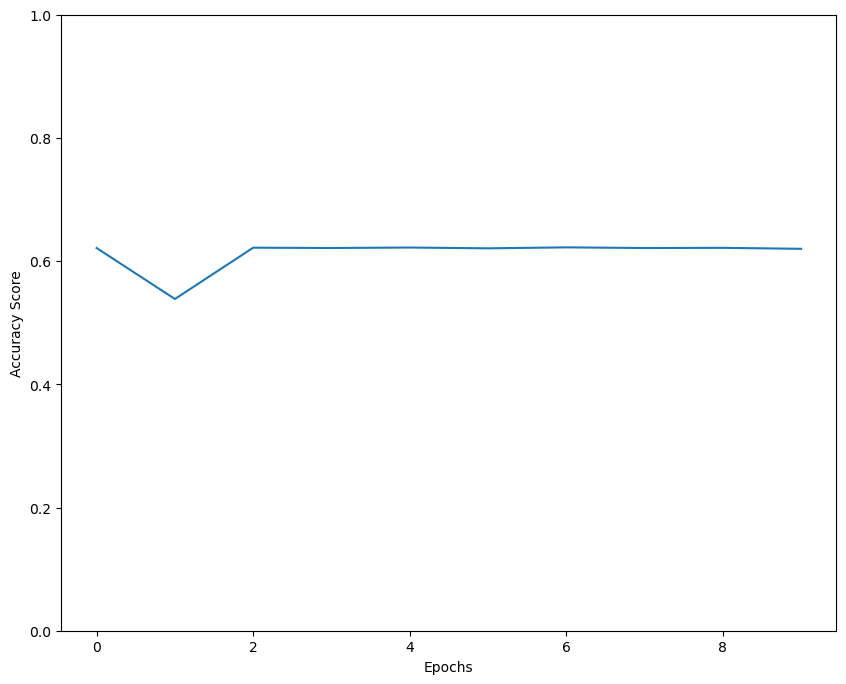

In [7]:
model=Perceptron()
model.Fit(x_train.values,y_train.values)